<a href="https://colab.research.google.com/github/RhoGitHub754/Biodiversity-in-National-Parks/blob/main/biodiversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Biodiversity in National Parks

Codecademy project - I will do a Data Analysis on endangered species from the National Park Service.

In this project I will analyse, clean, and plot data, think of questions and answer them meaningfully.

### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some marketing data. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

##Python Modules

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
import random
from scipy.stats import chi2_contingency

##Loading Data sets

In [2]:
#Observation Dataset (obs)
obs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codecademy - Data Analyst Portfolio/biodiversity_starter/observations.csv')

In [3]:
#Species Info Dataset (spe)
spe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codecademy - Data Analyst Portfolio/biodiversity_starter/species_info.csv')

##Data Inspection

###Observations

Insights are:

* There are 3 columns and 23296 rows.
* The name and datatype of each column -- most values are strings in this dataset.
* There appears to be no missing data
* There are 55441 unique scientific names and 4 park names
* Highest frequency scientific name is Puma concolor and park name is Yosemite National Park
* max observation is 321, min is 9, mean is 142

In [4]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
obs.columns

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

In [6]:
obs.shape

(23296, 3)

In [7]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [8]:
obs.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [9]:
obs.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Procyon lotor,Bryce National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [10]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [11]:
obs.duplicated().sum()

15

In [12]:
obs.drop_duplicates(inplace=True)

In [13]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23281 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23281 non-null  object
 1   park_name        23281 non-null  object
 2   observations     23281 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 727.5+ KB


###Species Info

Insights are:

* column names are category,	scientific_name,	common_names,	conservation_status.
* There are 4 columns and 5824 rows.
* The name and datatype of each column -- are all strings in this dataset.
* Conservation status has 5633 missing null values. I would assume that most wildlife in has no conservation status.
* There are 55441 unique scientific names and 4 park names
* Highest frequency scientific name is Puma concolor and park name is Yosemite National Park
* max observation is 321, min is 9, mean is 142
* scientific and common names have a different amount of unique names, which could be because common names could have more than one name while a scientific name appears to only have one.

In [14]:
spe.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [15]:
spe.shape

(5824, 4)

In [16]:
spe.columns

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

In [17]:
spe.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [18]:
spe.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

In [19]:
spe.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [20]:
spe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [21]:
spe.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [22]:
spe.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Myotis lucifugus,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [23]:
spe[['scientific_name', 'common_names']]

,scientific_name,common_names
0,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole
1,Bos bison,"American Bison, Bison"
2,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom..."
3,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)"
4,Cervus elaphus,Wapiti Or Elk
...,...,...
5819,Solanum parishii,Parish's Nightshade
5820,Solanum xanti,"Chaparral Nightshade, Purple Nightshade"
5821,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine"
5822,Vitis californica,"California Grape, California Wild Grape"


In [24]:
spe.duplicated().sum()

0

##Data Cleaning

I have created a dataframe merging the two datasets 

In [25]:
spe = spe.fillna('No Concern')
spe.tail()

,category,scientific_name,common_names,conservation_status
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Concern
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Concern
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Concern
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Concern
5823,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",No Concern


In [26]:
df = pd.merge(spe, obs, left_on='scientific_name', right_on='scientific_name', how='left')

In [27]:
df.tail()

,category,scientific_name,common_names,conservation_status,park_name,observations
25596,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Concern,Yellowstone National Park,237
25597,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",No Concern,Great Smoky Mountains National Park,50
25598,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",No Concern,Yellowstone National Park,239
25599,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",No Concern,Bryce National Park,111
25600,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",No Concern,Yosemite National Park,156


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25601 entries, 0 to 25600
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             25601 non-null  object
 1   scientific_name      25601 non-null  object
 2   common_names         25601 non-null  object
 3   conservation_status  25601 non-null  object
 4   park_name            25601 non-null  object
 5   observations         25601 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [29]:
print(df.conservation_status.unique())

['No Concern' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [30]:
df.conservation_status.value_counts()

No Concern            24721
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: conservation_status, dtype: int64

In [31]:
print(df.park_name.unique())

['Bryce National Park' 'Yellowstone National Park'
 'Great Smoky Mountains National Park' 'Yosemite National Park']


In [32]:
df.park_name.value_counts()

Bryce National Park                    6406
Yosemite National Park                 6402
Yellowstone National Park              6397
Great Smoky Mountains National Park    6396
Name: park_name, dtype: int64

In [33]:
df.describe(include='all')

,category,scientific_name,common_names,conservation_status,park_name,observations
count,25601,25601,25601,25601,25601,25601.000000
unique,7,5541,5504,5,4,NaN
top,Vascular Plant,Myotis lucifugus,Dicranum Moss,No Concern,Bryce National Park,NaN
freq,19534,36,28,24721,6406,NaN
mean,NaN,NaN,NaN,NaN,NaN,142.196477
std,NaN,NaN,NaN,NaN,NaN,69.901035
min,NaN,NaN,NaN,NaN,NaN,9.000000
25%,NaN,NaN,NaN,NaN,NaN,86.000000
50%,NaN,NaN,NaN,NaN,NaN,123.000000
75%,NaN,NaN,NaN,NaN,NaN,195.000000


In [34]:
print(df.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [35]:
df.observations.max()

321

## Exploratory Data Analysis

After some data cleaning and tidying, the DataFrame is ready for EDA.

The hope is that through summary statistics and visualizations the following question can be answered:
* What is the distribution of conservation_status for animals?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which species were spotted the most at each park?

Along the way, this question may be refined and more questions may pop up.


Are certain types of species more likely to be endangered?

Are the differences between species and their conservation status significant?

####What is the distribution of conservation_status for animals?

In this count plot we can see that Vascular plants have the most items by far making it difficult to see the other categories.

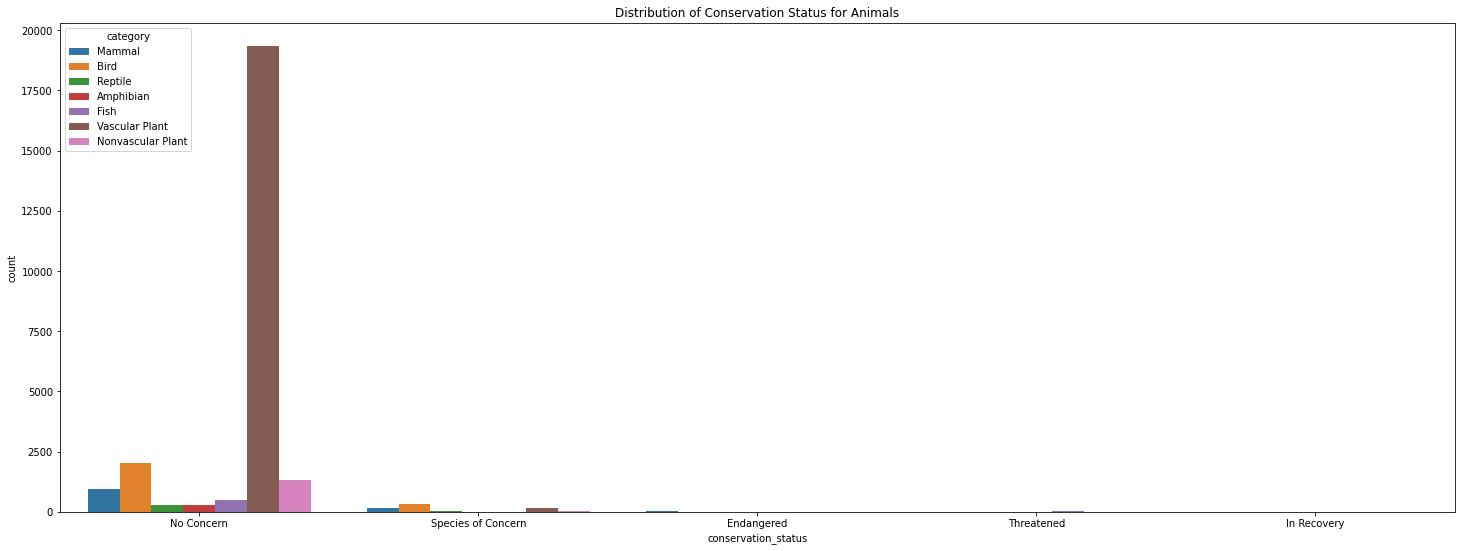

In [36]:
plt.figure(figsize=(25,9))
sns.countplot(x=df.conservation_status, hue=df.category)
plt.title('Distribution of Conservation Status for Animals')
plt.show()

Now to remove make the animal dataframe containing only the animal information and the all other conservation statuses except 'No concern'

In [37]:
animal = df.loc[df['category'].isin(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish']) & (df['conservation_status'] != 'No Concern')]

We can see from the data description that bird is the top result of animal category.

In [38]:
animal.describe(include='object')

,category,scientific_name,common_names,conservation_status,park_name
count,676,676,676,676,676
unique,5,128,139,4,4
top,Bird,Myotis lucifugus,"Gray Wolf, Wolf",Species of Concern,Great Smoky Mountains National Park
freq,348,36,24,540,169


With the new chart we can see again that birds have the most scientific names in the species of concern column.

In [39]:
animal.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()

category,Amphibian,Bird,Fish,Mammal,Reptile
conservation_status,,,,,
Endangered,4.0,16.0,12.0,44.0,NaN
In Recovery,NaN,12.0,NaN,12.0,NaN
Species of Concern,16.0,320.0,16.0,168.0,20.0
Threatened,8.0,NaN,20.0,8.0,NaN


We can now visually confirm that its mostly birds followed by mammals that have the most species of concern in these parks

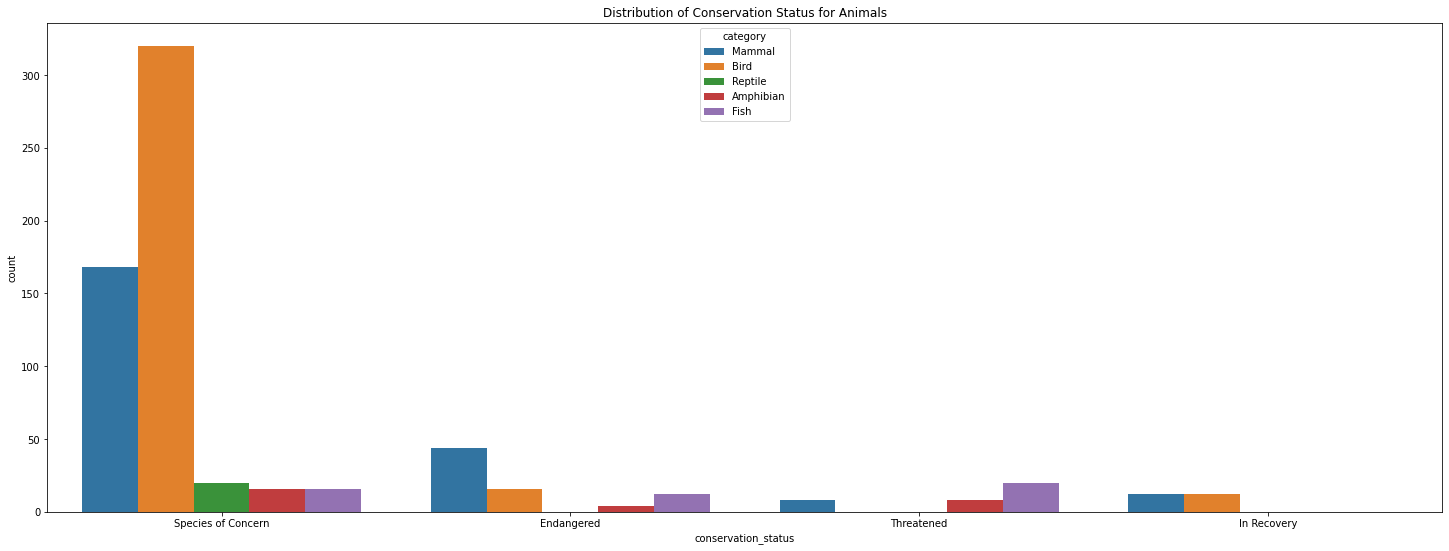

In [40]:
plt.figure(figsize=(25,9))
sns.countplot(x=animal.conservation_status, hue=animal.category)
plt.title('Distribution of Conservation Status for Animals')
plt.show()

###Are certain types of species more likely to be endangered?

The below table shows the amount of species protected within each category, the total amount and the percentage of those that are protected.

In [58]:
protected = df[df.conservation_status != 'No Concern'].category.value_counts().reset_index().rename(columns={'category': 'protected'})

protected

,index,protected
0,Bird,348
1,Mammal,232
2,Vascular Plant,184
3,Fish,48
4,Amphibian,28
5,Nonvascular Plant,20
6,Reptile,20


In [59]:
total = df.category.value_counts().reset_index()
total

,index,category
0,Vascular Plant,19534
1,Bird,2361
2,Nonvascular Plant,1332
3,Mammal,1198
4,Fish,524
5,Amphibian,328
6,Reptile,324


In [60]:
protected = protected.merge(total)

protected.rename(columns={'category': 'total', 'index' : 'category'}, inplace=True)

protected['percentage'] = round(protected['protected'] / protected['total'] * 100, 2)

protected

,category,protected,total,percentage
0,Bird,348,2361,14.74
1,Mammal,232,1198,19.37
2,Vascular Plant,184,19534,0.94
3,Fish,48,524,9.16
4,Amphibian,28,328,8.54
5,Nonvascular Plant,20,1332,1.50
6,Reptile,20,324,6.17


This bar plot is a visual representation of the table with mammals having the heighest percentage of proctected species.

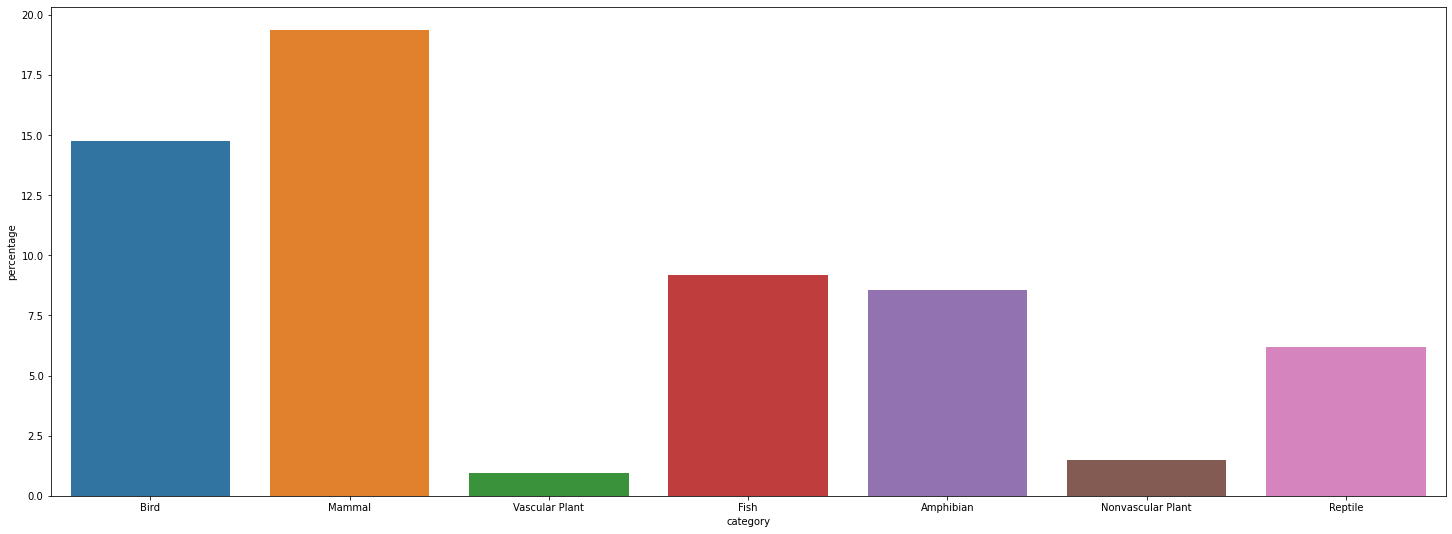

In [61]:
plt.figure(figsize=(25,9))
sns.barplot(x=protected.category, y=protected.percentage)
plt.show()

###Are the differences between species and their conservation status significant?

I will run a chi squared hypothosis test to see if different species have statistically significant differences in conservation status rates.

First I will build contigency tables then run chi test on the categories with the highest percentage protected which is mammal and bird.

running the chi2 test we can see that the resulting pval is less that our significance threshold of 0.05 meaning that there is a significant association between these variables.

In [83]:
# create contingency table
mammal_bird = [[348, 2361],
              [232, 1198]]
chi2_contingency(mammal_bird)
 
# run a Chi-Square test
chi2, pval, dof, expected = chi2_contingency(ab_contingency)

pval

2.841850507285727e-43

###Which species were spotted the most at each park?

In this barplot we can see that Yellowstone National Park by far has the highest rate of biodiversity.

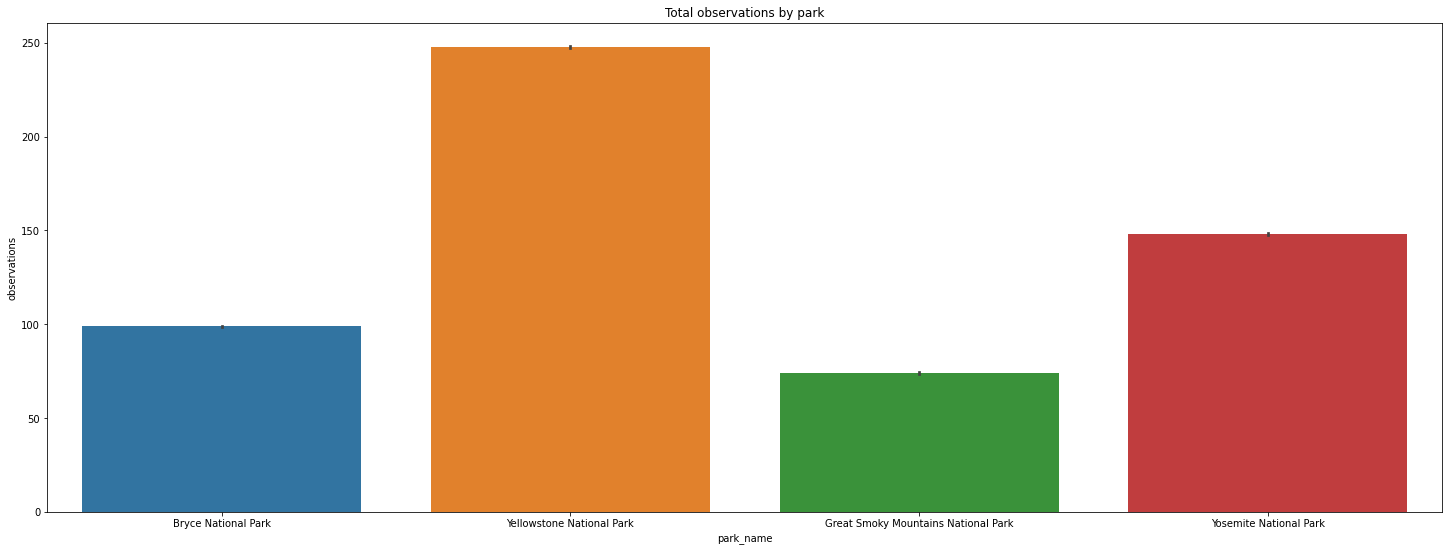

In [84]:
plt.figure(figsize=(25,9))
sns.barplot(x=df.park_name, y=df.observations)
plt.title('Total observations by park')
plt.show()

I have grouped all the entries by scientific name and ordered them by the amount of observations

In [85]:
spotted_most = df.groupby('scientific_name').sum('observations')
spotted_most.sort_values(by='observations', inplace=True)
spotted_most.tail(5)

,observations
scientific_name,
Procyon lotor,5076
Puma concolor,5133
Hypochaeris radicata,5160
Castor canadensis,5175
Holcus lanatus,5340


I have now created a new dataframe containing only the most common species 

In [86]:
most_common = df.loc[(df.scientific_name == 'Puma concolor') | (df.scientific_name == 'Procyon lotor') | (df.scientific_name == 'Hypochaeris radicata	') | (df.scientific_name == 'Castor canadensis') | (df.scientific_name == 'Holcus lanatus')]
most_common

,category,scientific_name,common_names,conservation_status,park_name,observations
88,Mammal,Puma concolor,Panther (Mountain Lion),No Concern,Bryce National Park,92
89,Mammal,Puma concolor,Panther (Mountain Lion),No Concern,Great Smoky Mountains National Park,79
90,Mammal,Puma concolor,Panther (Mountain Lion),No Concern,Yellowstone National Park,243
91,Mammal,Puma concolor,Panther (Mountain Lion),No Concern,Great Smoky Mountains National Park,48
92,Mammal,Puma concolor,Panther (Mountain Lion),No Concern,Yosemite National Park,121
...,...,...,...,...,...,...
24676,Vascular Plant,Holcus lanatus,"Common Velvetgrass, Velvetgrass, Yorkshire Fog",No Concern,Great Smoky Mountains National Park,65
24677,Vascular Plant,Holcus lanatus,"Common Velvetgrass, Velvetgrass, Yorkshire Fog",No Concern,Yellowstone National Park,256
24678,Vascular Plant,Holcus lanatus,"Common Velvetgrass, Velvetgrass, Yorkshire Fog",No Concern,Great Smoky Mountains National Park,77
24679,Vascular Plant,Holcus lanatus,"Common Velvetgrass, Velvetgrass, Yorkshire Fog",No Concern,Great Smoky Mountains National Park,74


In [87]:
most_common.describe(include=object)

,category,scientific_name,common_names,conservation_status,park_name
count,144,144,144,144,144
unique,2,4,12,1,4
top,Mammal,Puma concolor,"Common Raccoon, Raccoon",No Concern,Bryce National Park
freq,108,36,12,144,36


In [88]:
most_common_chart = most_common.groupby(['scientific_name', 'park_name']).sum().reset_index()
most_common_chart

,scientific_name,park_name,observations
0,Castor canadensis,Bryce National Park,834
1,Castor canadensis,Great Smoky Mountains National Park,729
2,Castor canadensis,Yellowstone National Park,2109
3,Castor canadensis,Yosemite National Park,1503
4,Holcus lanatus,Bryce National Park,888
5,Holcus lanatus,Great Smoky Mountains National Park,648
6,Holcus lanatus,Yellowstone National Park,2415
7,Holcus lanatus,Yosemite National Park,1389
8,Procyon lotor,Bryce National Park,741
9,Procyon lotor,Great Smoky Mountains National Park,741


The bar plot displays the most common species and their frequency of observations within each park

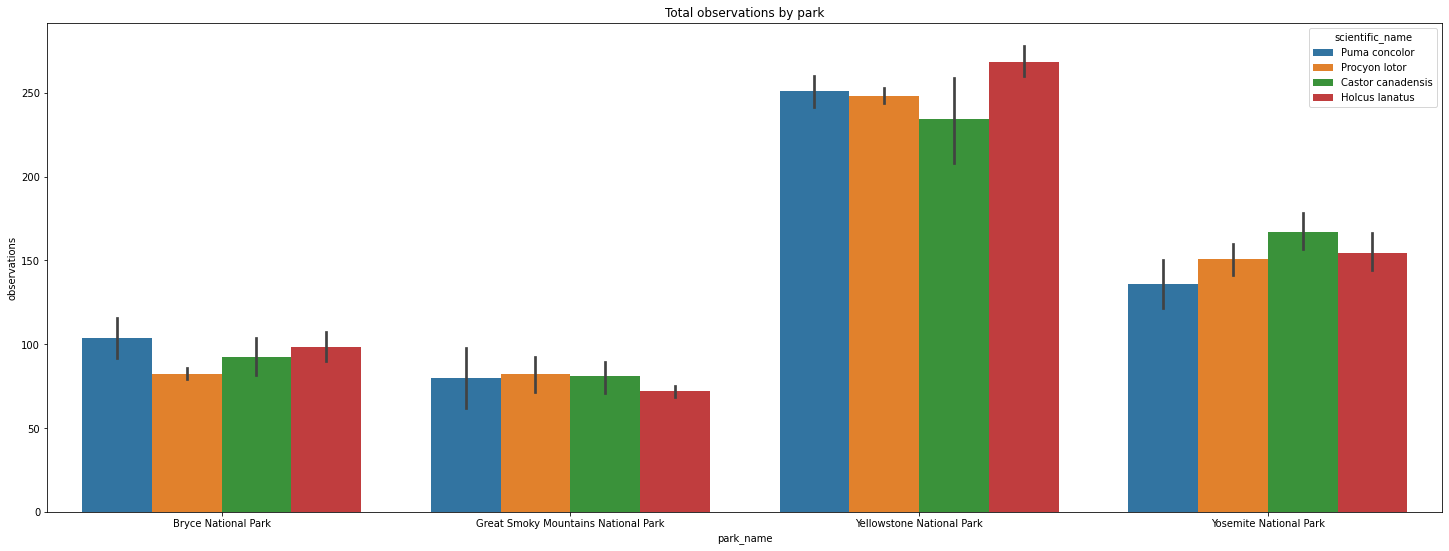

In [89]:
plt.figure(figsize=(25,9))
sns.barplot(x=most_common.park_name, y=most_common.observations, hue=most_common.scientific_name)
plt.title('Total observations by park')
plt.show()

##Conclusion

1. What is the distribution of conservation_status for animals?
  * Majority of species have a 'no concern status', majority of these have the category Vascular plant.
  * Majority of endangered species have the concervation status 'species of concern', majority of those are birds followed by mammals
2. Are certain types of species more likely to be endangered?
  * Birds and Mammals are more likely to be endangered.
3. Are the differences between species and their conservation status significant?
  * There is a significant association between bird and mammal categories
4. Which species were spotted the most at each park?
  * Procyon lotor
  * Puma concolor
  * Hypochaeris radicata
  * Castor canadensis
  * Holcus lanatus
